In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sna-project-data/astro_data.txt
/kaggle/input/sna-project-data/data.txt


Importing Necessary Packages

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

CAIDA Network loaded using NetworkX Package

In [4]:
print("Checkpoint: Loading graph from file...")
G = nx.read_edgelist("/kaggle/input/sna-project-data/data.txt", nodetype=int)
print("Graph loaded!")

Checkpoint: Loading graph from file...
Graph loaded!


Degree Distribution of CAIDA network

In [5]:
degree_sequence = dict(G.degree())
dmax = max(degree_sequence.values())
dmin = min(degree_sequence.values())

In [6]:
dave = np.mean(list(degree_sequence.values()))
dstd = np.std(list(degree_sequence.values()))

In [7]:
print(dmin, dmax, dave, dstd)

1 2628 4.0325590179414545 33.37416456767476


In [8]:
degree_counts = Counter(degree_sequence.values())
degree_values = list(degree_counts.keys())
frequencies = list(degree_counts.values())

In [9]:
print(degree_values, len(degree_values))
print(frequencies, len(frequencies))

[3, 227, 2, 913, 518, 1631, 2628, 999, 271, 176, 47, 239, 14, 42, 9, 59, 1, 50, 7, 30, 4, 6, 36, 11, 5, 49, 34, 13, 8, 16, 19, 12, 564, 26, 405, 497, 1699, 2052, 113, 290, 292, 89, 615, 498, 1677, 220, 308, 319, 177, 311, 695, 20, 61, 124, 40, 222, 169, 72, 233, 95, 135, 540, 10, 156, 143, 327, 417, 142, 487, 52, 159, 38, 45, 31, 96, 17, 35, 102, 128, 23, 71, 99, 24, 21, 15, 27, 469, 129, 198, 426, 437, 111, 37, 68, 88, 182, 109, 51, 56, 104, 67, 127, 190, 53, 282, 22, 32, 33, 25, 28, 94, 65, 44, 82, 78, 18, 43, 83, 29, 58, 91, 184, 1272, 63, 114, 41, 60, 77, 66, 106, 39, 48, 87, 126, 166, 193, 55, 80, 123, 154, 57, 376, 62, 69, 54, 140, 194, 64, 174, 125, 107, 155, 133, 76, 108, 122, 84, 101] 158
[2509, 1, 10465, 1, 1, 1, 1, 1, 1, 1, 6, 1, 62, 8, 129, 2, 9937, 3, 237, 11, 1028, 341, 7, 98, 535, 6, 7, 60, 171, 40, 35, 75, 2, 14, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 32, 3, 1, 7, 1, 2, 2, 2, 1, 1, 1, 128, 2, 1, 2, 1, 1, 1, 7, 1, 8, 9, 10, 2, 44, 11, 1, 1, 21, 6, 2, 19, 21, 

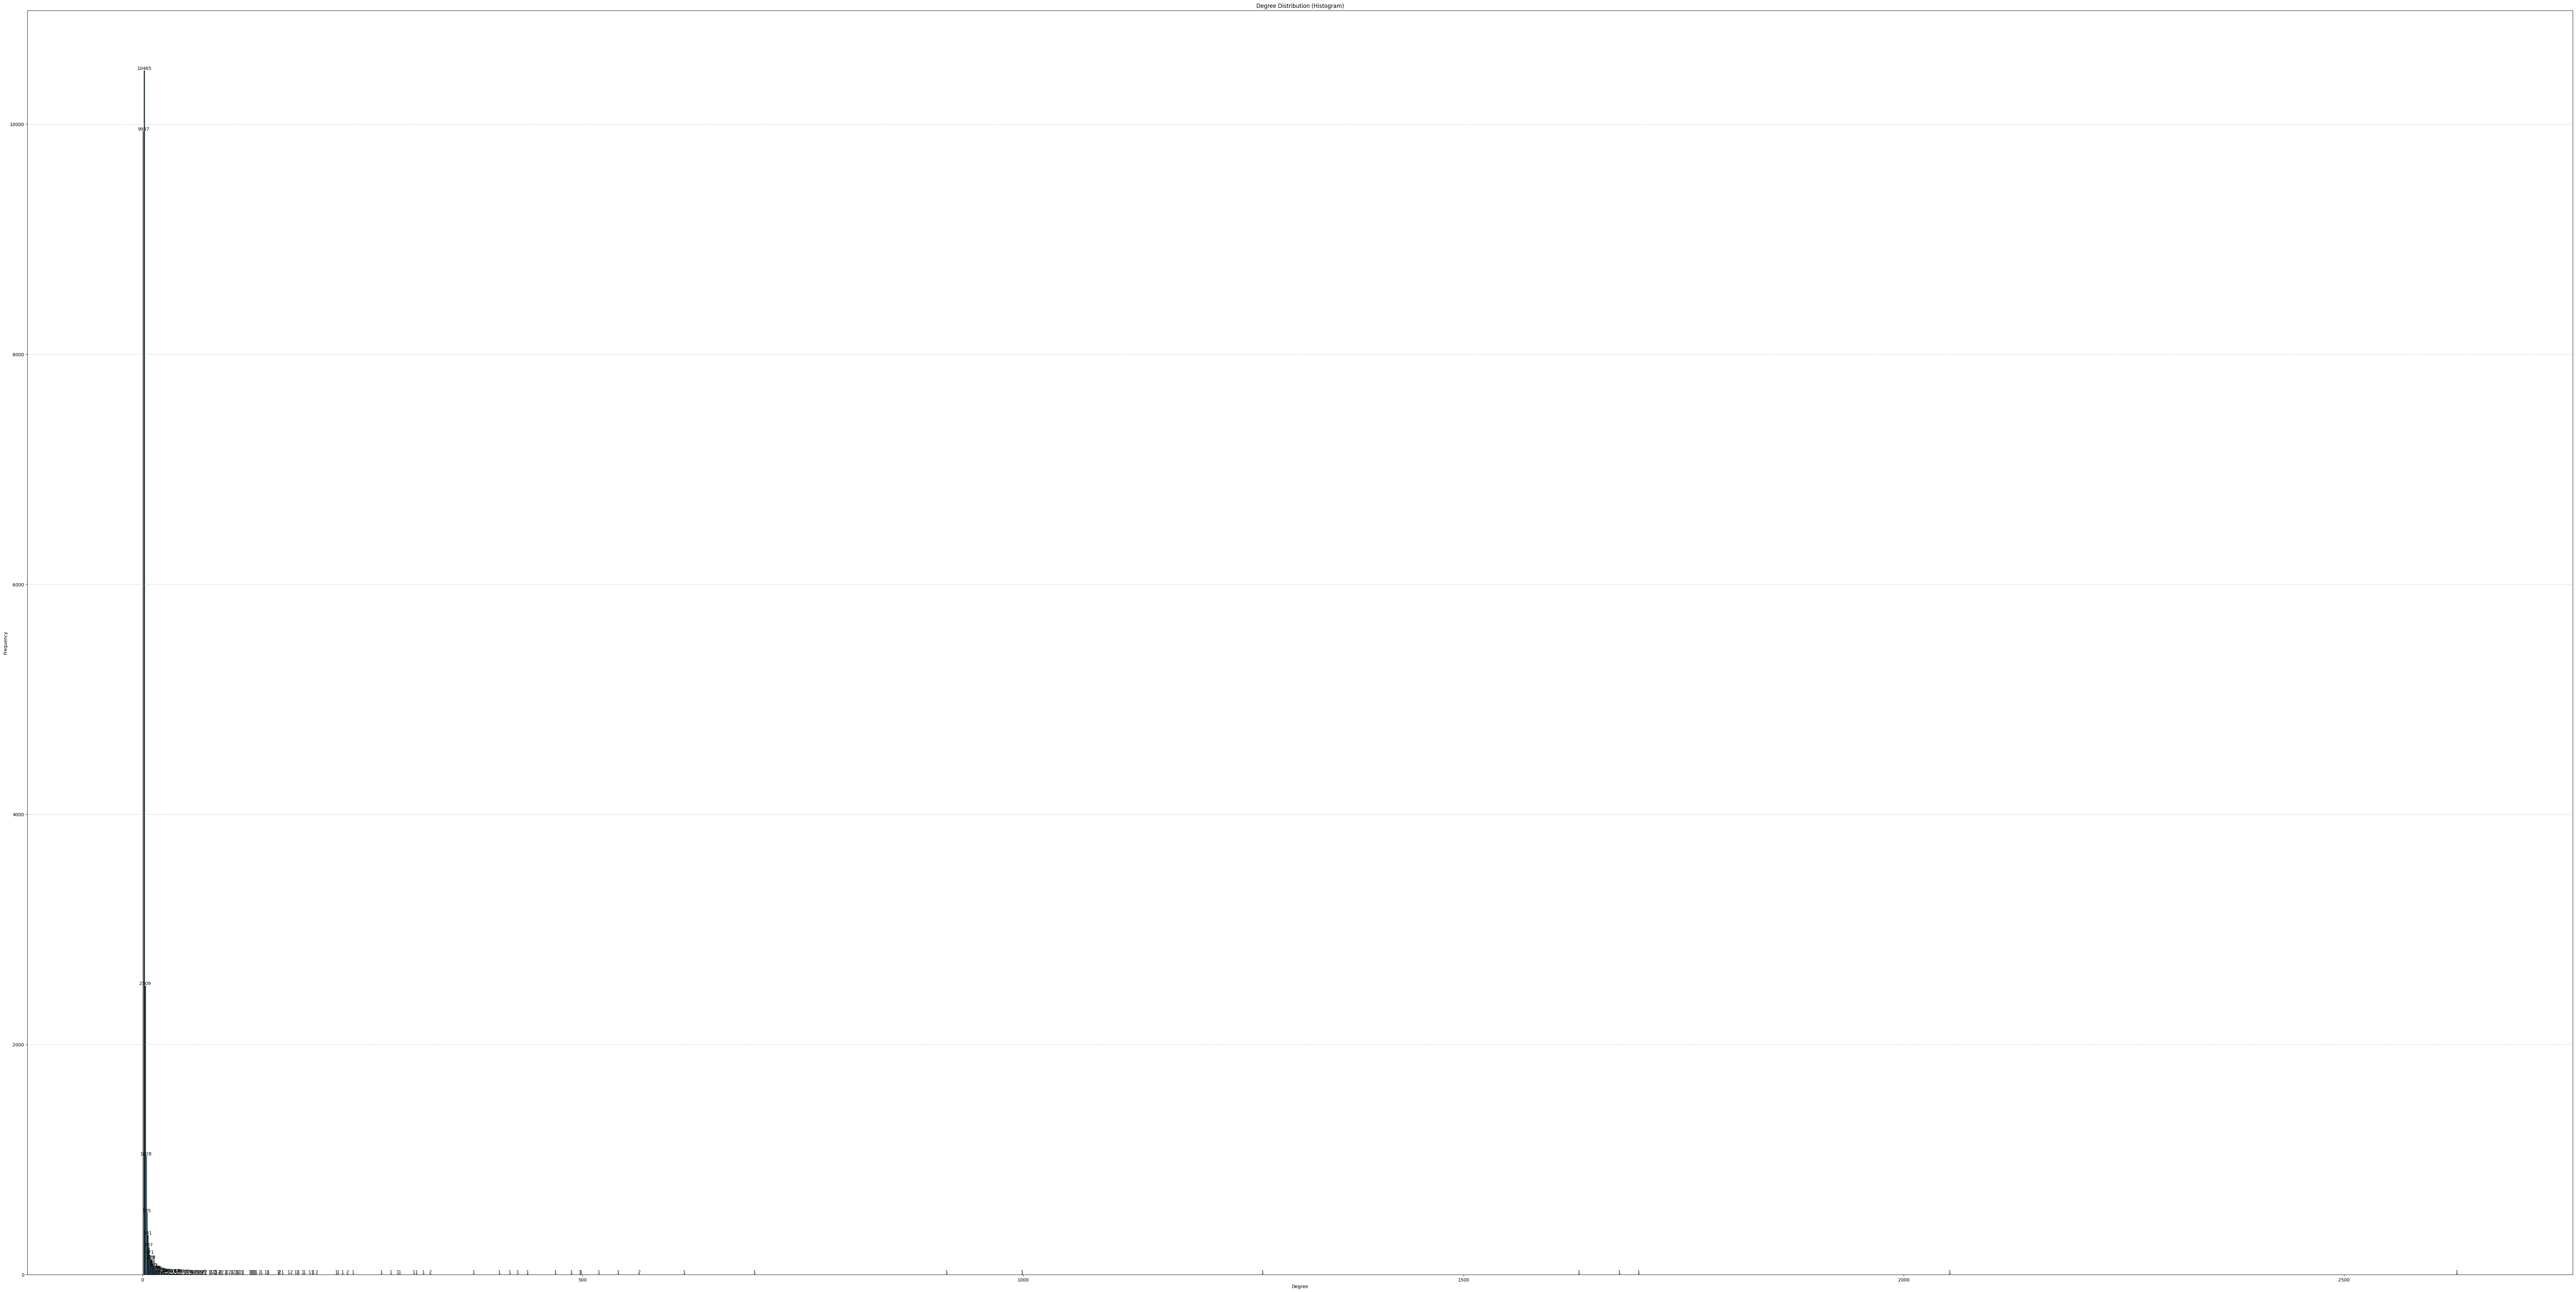

In [10]:
import matplotlib.pyplot as plt

# Assuming degree_values and frequencies are already computed
# degree_values: List of unique degrees in the network
# frequencies: List of frequencies corresponding to each degree

# Create a bar plot
plt.figure(figsize=(100, 50))
bars = plt.bar(degree_values, frequencies, width=0.8, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Histogram)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add frequency labels on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height (frequency) of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate (center of the bar)
        height + 0.1,                      # y-coordinate (slightly above the bar)
        f'{int(height)}',                  # Text to display (frequency as integer)
        ha='center',                       # Horizontal alignment (centered)
        va='bottom'                        # Vertical alignment (bottom of the text)
    )

# Show the plot
plt.show()

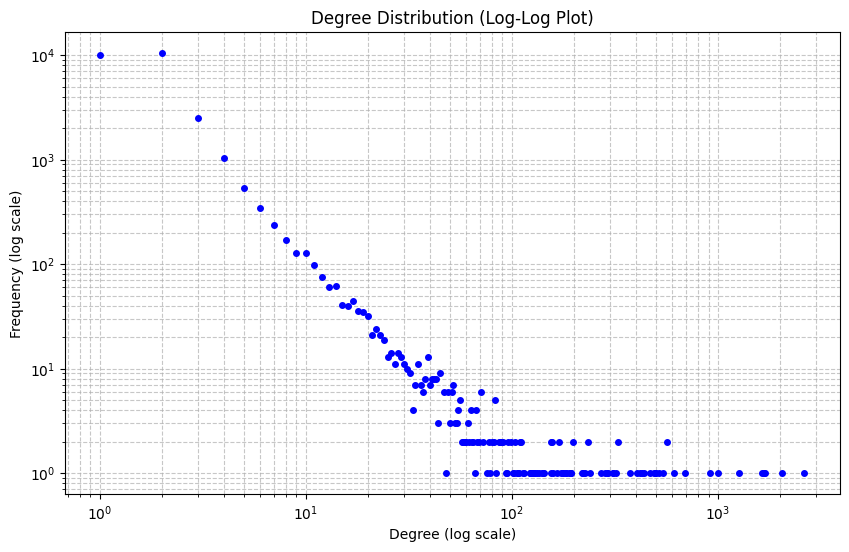

In [11]:
# Plot with logarithmic scaling
plt.figure(figsize=(10, 6))
plt.loglog(degree_values, frequencies, marker='o', linestyle='None', color='b', markersize=4)

# Add labels and title
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Log-Log Plot)')
plt.grid(which='both', linestyle='--', alpha=0.7)
plt.savefig('CAIDA_DegreeDist')
# Show the plot
plt.show()